# Home work no.4
>## professor : Dr. Vahid Khazaei nezhad
# Team Members :
- Saeed Tizkar
- Pooriya Amini
- Mohammad Elahi

# Import libraries

In [59]:
import numpy as np
import pandas as pd
import networkx as nx

from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

print('libraries loaded.')

libraries loaded.


# Loading IRIS dataset

In [60]:
df_iris = pd.read_csv('Data/iris.txt', sep= ',', header= None) 

df_iris.head()

0    1    2    3                4
0  5.9  3.0  4.2  1.5  Iris-versicolor
1  6.9  3.1  4.9  1.5  Iris-versicolor
2  6.6  2.9  4.6  1.3  Iris-versicolor
3  4.6  3.2  1.4  0.2      Iris-setosa
4  6.0  2.2  4.0  1.0  Iris-versicolor

# Calculating similarities between samples

## defining function for calculating similarity

In [61]:
def calculate_similarity(A, B, std):
    '''The function definition fgoes here.'''
    
    from numpy.linalg import norm
    
    return np.exp(np.divide(norm(np.subtract(A, B))**2, -2 * std**2))
   

## Calculating IRIS standard seviation

In [62]:
std = 0.73

## Calculating similarities

In [63]:
similarity_values = np.zeros((len(df_iris), len(df_iris)))

similarity_values.fill(np.nan)

for i in range(len(df_iris)):
    
    for j in range(i + 1, len(df_iris)):
        
        similarity_values[i, j] = np.round(calculate_similarity(df_iris.loc[i][:4], df_iris.loc[j][:4], std), 3)
    
    

## Calculating mean & standard deviation of similarities

In [64]:
similarity_mean = np.round(np.nanmean(similarity_values), 3)

similarity_std = np.round(np.nanstd(similarity_values), 3)

print(f'Similarity mean: {similarity_mean}, std: {similarity_std}')

Similarity mean: 0.199, std: 0.289


# Calculating adjacent matrix based on similarities

## Defining the threshold

In [65]:
threshold = np.round(similarity_mean + (2 * similarity_std), 3)

threshold

0.777

## Producing adjacent matrix based on threshold value

In [66]:
adjacent = np.copy(similarity_values)

adjacent = np.where(adjacent >= threshold, 1, 0)

adjacent[np.isnan(adjacent)] = 0

print('Number of edges: ', adjacent.sum())

Number of edges:  803


# Graph analysis

In [67]:
adjacent_df = pd.DataFrame(adjacent.T + adjacent)

#adjacent_df = adjacent_df.loc[adjacent_df.sum() != 0, adjacent_df.sum() != 0 ]

adjacent_df.shape

(150, 150)

## Calculating degree of nodes

Mean of nodes degree:  10.707


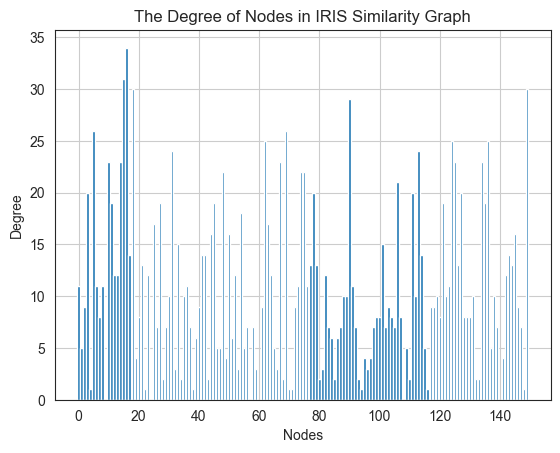

In [68]:
degree_of_nodes = adjacent_df.sum().to_dict()

mean_of_degree = np.sum(list(degree_of_nodes.values()))/ 150.0

print('Mean of nodes degree: ', np.round(mean_of_degree, 3))

plt.bar(degree_of_nodes.keys(), degree_of_nodes.values())

plt.title('The Degree of Nodes in IRIS Similarity Graph')

plt.xlabel('Nodes')
plt.ylabel('Degree')

plt.grid()

plt.show()

## Representing degree sequence

In [69]:
degree_sequence = dict(sorted(degree_of_nodes.items(), key= lambda item: item[1], reverse= True))

print(list(degree_sequence.values()))

[34, 31, 30, 30, 29, 26, 26, 25, 25, 25, 24, 24, 23, 23, 23, 23, 23, 22, 22, 22, 21, 20, 20, 20, 20, 19, 19, 19, 19, 19, 18, 17, 17, 16, 16, 16, 15, 15, 14, 14, 14, 14, 14, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]


## Representing degree distribution

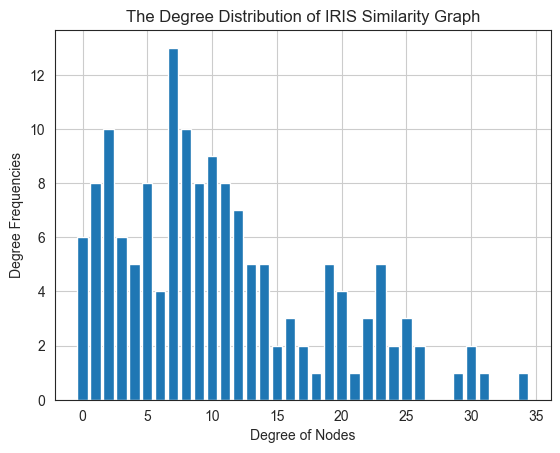

In [70]:
degree_distribution = Counter(degree_sequence.values())

plt.bar(degree_distribution.keys(), degree_distribution.values())

plt.title('The Degree Distribution of IRIS Similarity Graph')

plt.xlabel('Degree of Nodes')
plt.ylabel('Degree Frequencies')

plt.grid()

plt.show()

## Representing degree probability mass function (PMF)

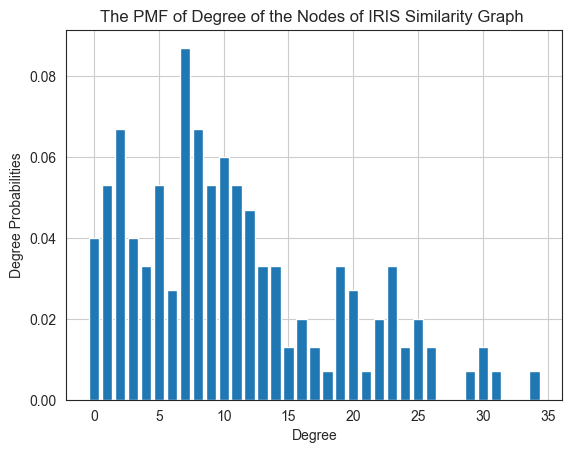

In [71]:
pmf = {d: np.round(nk / 150, 3) for d, nk in degree_distribution.items()}

plt.bar(pmf.keys(), pmf.values())

plt.title('The PMF of Degree of the Nodes of IRIS Similarity Graph ')

plt.xlabel('Degree')
plt.ylabel('Degree Probabilities')

plt.grid()

plt.show()

## Calculating path average of the graph

In [72]:
G = nx.from_pandas_adjacency(adjacent_df, create_using= nx.DiGraph)

print('Number of strongly connected components in the IRIS graph', nx.number_strongly_connected_components(G))

Number of strongly connected components in the IRIS graph 11


### Extracting Components

In [73]:
graphs = nx.condensation(G)

component_0 = graphs.nodes.data()[0]['members']

component_1 = graphs.nodes.data()[1]['members']

G0 = G.subgraph(component_0)

G1 = G.subgraph(component_1)

print('Diameter of component_0: ', nx.diameter(G0), end= '')

print(' Radius of component_0: ', nx.radius(G0))

print('Diameter of component_1: ', nx.diameter(G1), end= '')

print('  Radius of component_1: ', nx.radius(G1))

Diameter of component_0:  10 Radius of component_0:  5
Diameter of component_1:  6  Radius of component_1:  3


### Average shortest path for each component

In [74]:
print('Path average for component_0: ', np.round(nx.average_shortest_path_length(G0), 2))

print('Path average for component_1: ', np.round(nx.average_shortest_path_length(G1), 2))

Path average for component_0:  3.9
Path average for component_1:  1.96


# Exercises

## Exercise1 : Draw the calculated adjacency matrix(graph) with networkx library

>## Graph displayer

In [91]:
def show_adj_matrix_graph(matrix , show_label=False, node_shape_map_cb=None, pos=None, figsize=[50,50]) :
    matrix = nx.to_undirected(matrix)
    
    is_connected = nx.is_connected(matrix)
    if not pos:
        # برای گراف نمایشی، یک چیدمان تصادفی انتخاب میکنیم
        pos = nx.random_layout(matrix, seed = 54896)
    # pos = nx.spring_layout(matrix)
    # بررسی میکنیم که گراف همبند هست یا نه
    # براساس همبند بودن یا نبودن، شکل رنگ دهی به گره ها رو تعیین میکنیم
    # به این شکل که اگر گراف همبند باشه، اول گره وسط دستگاه مختصات رو پیدا میکنیم (یک گره تصادفی) و بعد بر اساس فاصله مسیر بین این گره و گره های دیگه اونا رو رنگ دهی میکنی
    # هرچی نزدیکتر باشند، پررنگ تر و هرچی دورتر باشند کمرنگ تر هستند
    # منظور از فاصله مسیر، تعداد یال های لازم برای رسیدن به گره دیگر هست و لزوما بهینه نیست و از الگوریتم جستجوی عرضی (bfs) استفاده شده
    if is_connected :
        # ابتدا گره مرکزی رو بر اساس موقعیت اون در دستگاه مختصات پیدا میکنیم
        dmin = 1
        ncenter = 0
        for n in pos:
            x, y = pos[n]
            d = (x - 0.5) ** 2 + (y - 0.5) ** 2
            if d < dmin:
                ncenter = n
                dmin = d
        p = dict(nx.single_source_shortest_path_length(G, ncenter))
    w, h = figsize;
    plt.figure(1, figsize=(w, h))
    nx.draw_networkx_edges(matrix, pos, alpha=0.1, arrows=False)
    
    if node_shape_map_cb :
        shapes = {}
        not_connected_colors = ['red', 'blue', 'yellow', 'black', 'green']
        nodes = list(matrix.nodes())
        # اول براساس تابع لامبدای ارسالی، گره ها رو براساس شکلشون کلاس بندی میکنیم
        for node in nodes:
            shape = node_shape_map_cb(node)
            if shape not in shapes :
                shapes[shape] = []
            shapes[shape].append(node)
        # بعد کلاس بندی حالا شروع به ترسیم هر کلاس میکنیم
        shape_counter = 0
        for shape in shapes :
            sub_color_args = {'node_color': [p[i] for i in shapes[shape] if i in p]} if is_connected else {'node_color': [not_connected_colors[shape_counter]] * len(shapes[shape])}
            nx.draw_networkx_nodes(
                matrix,
                pos,
                nodelist= shapes[shape],
                cmap=plt.cm.Reds_r,
                **sub_color_args,
                node_shape=shape
            )
            shape_counter += 1
    else :
        draw_networkx_nodes_args = {'node_color': list(p.values())} if is_connected else {}
        
        nx.draw_networkx_nodes(
            matrix,
            pos,
            nodelist= list(p.keys() if is_connected else matrix.nodes()),
            node_size=80,
            cmap=plt.cm.Reds_r,
            **draw_networkx_nodes_args
        )
        
    if show_label :
        nodes = list(matrix.nodes())
        nx.draw_networkx_labels(
            matrix,
            pos,
            labels= {nodes[i]: nodes[i] for i in range(len(nodes))},
            font_size=8
        )
    

    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.axis("off")
    plt.show()

>## Component 1 - circular layout

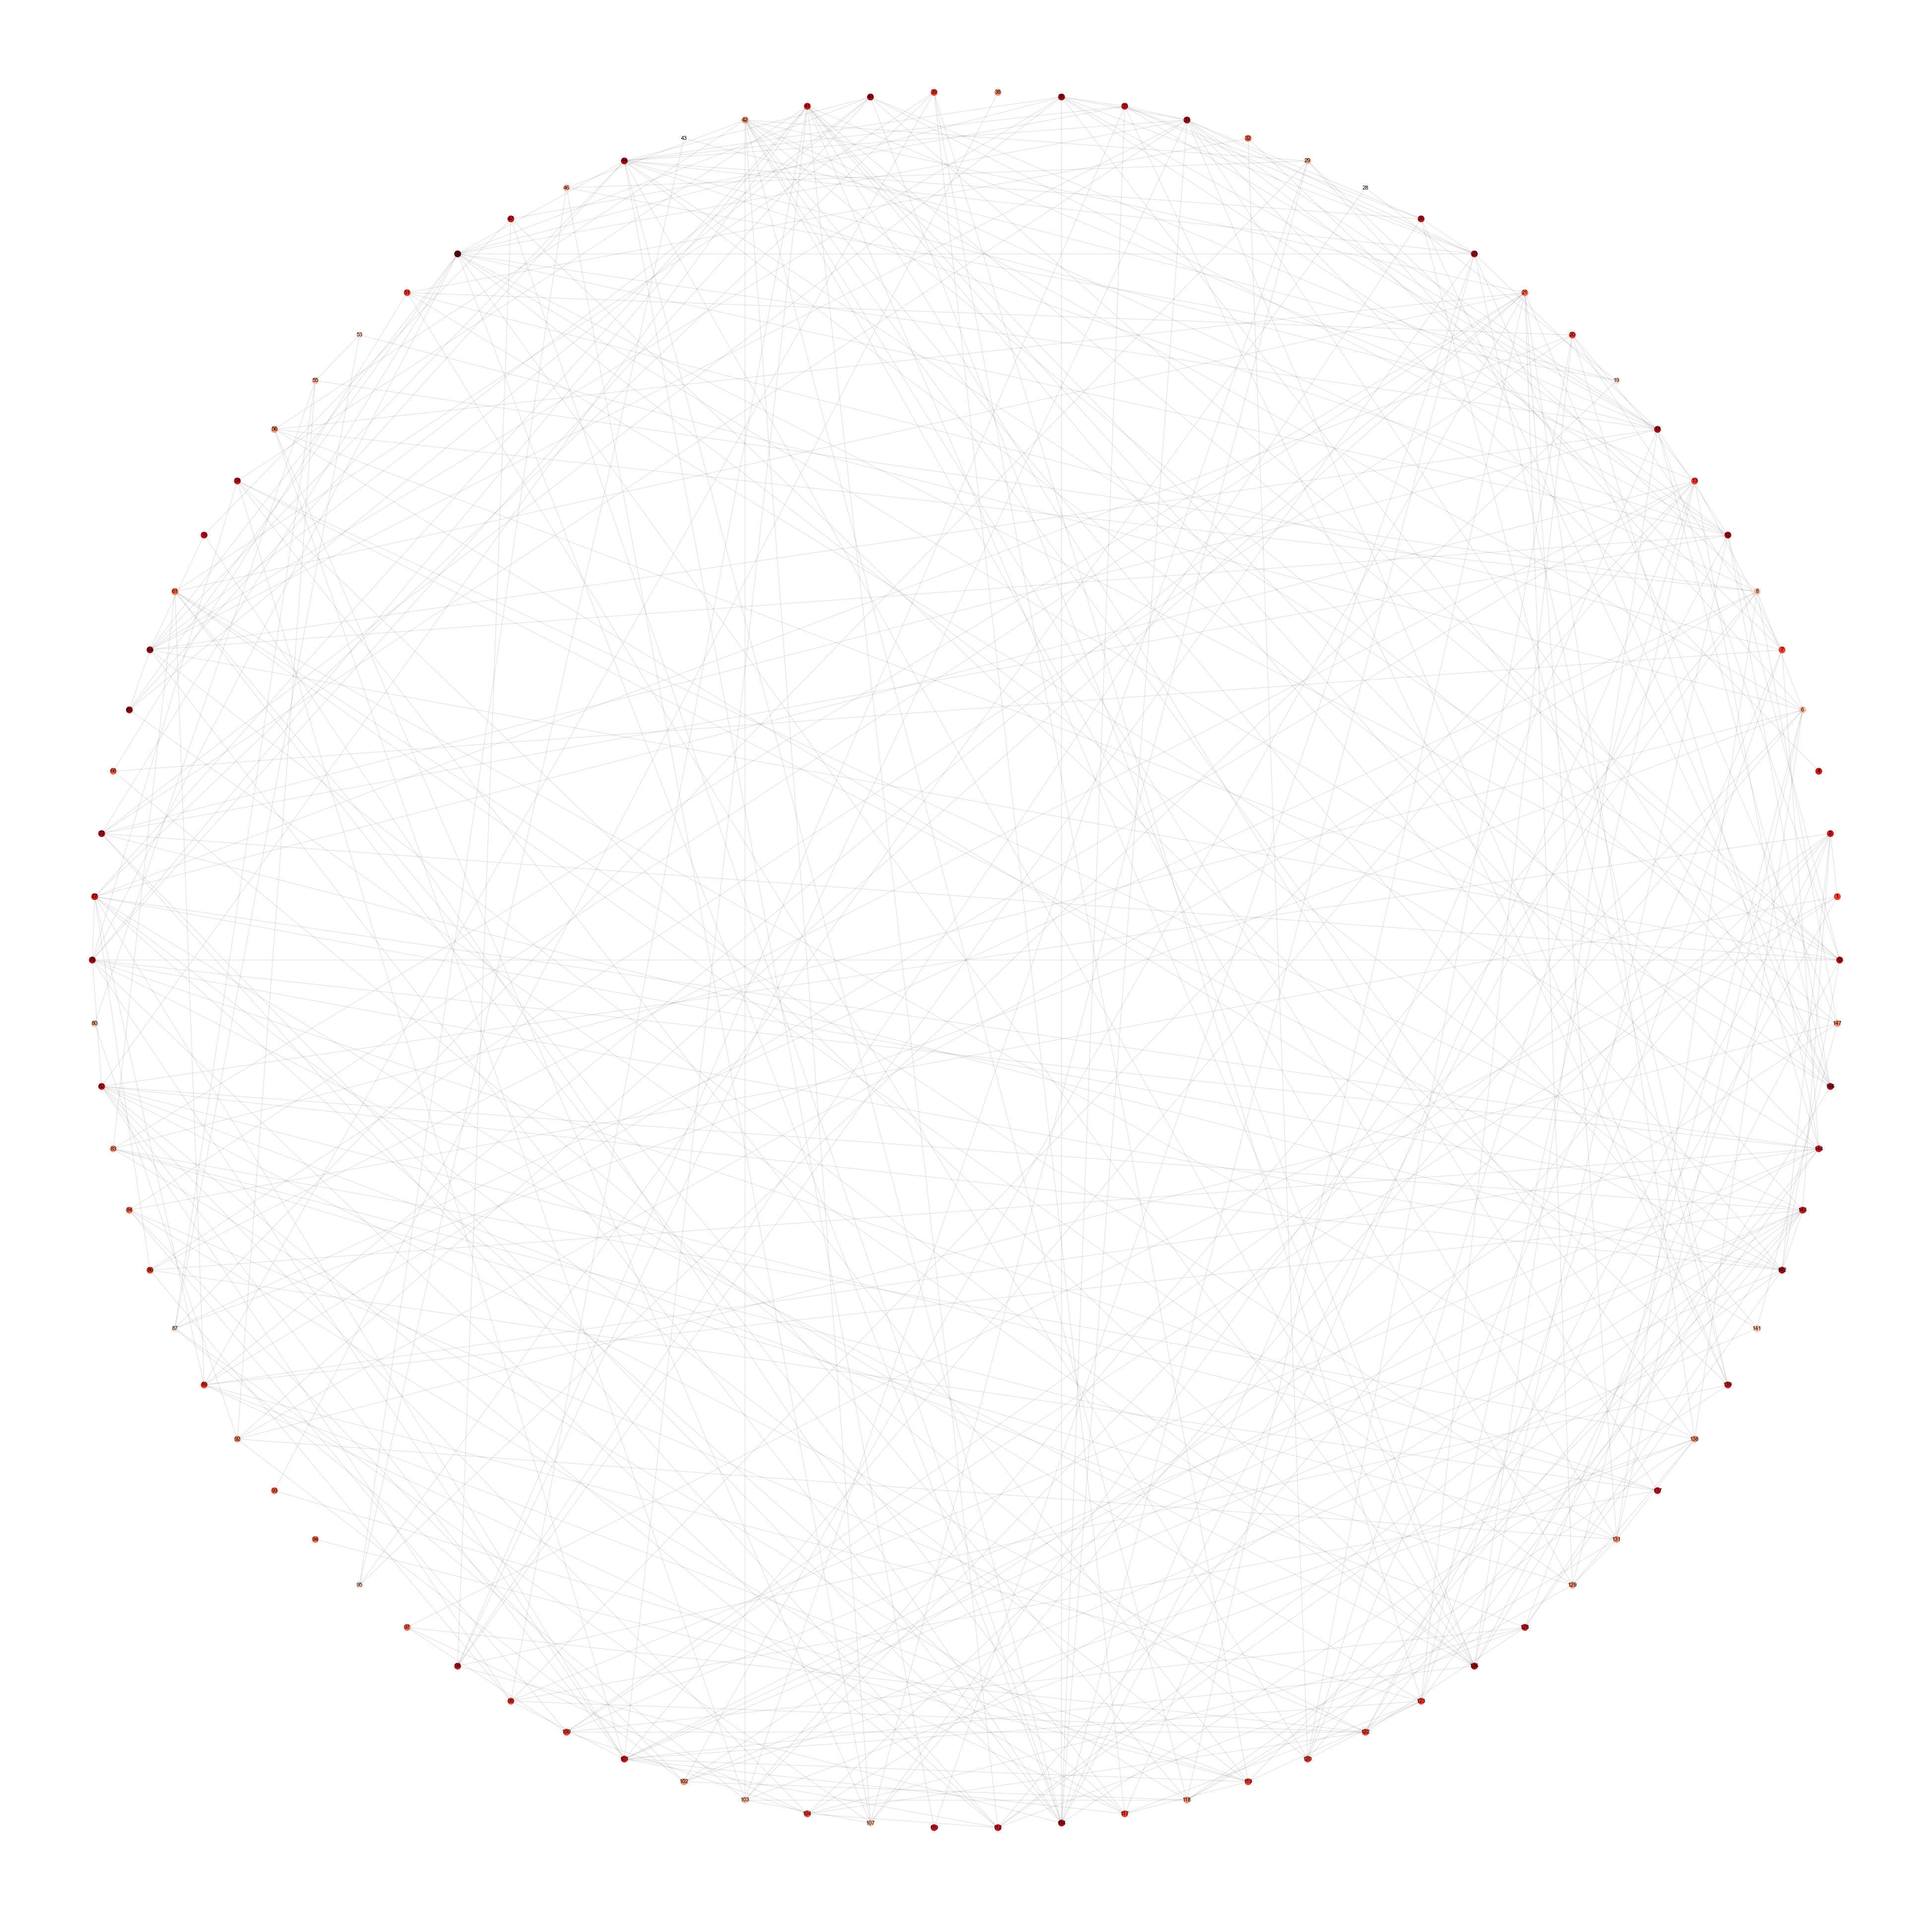

In [92]:
show_adj_matrix_graph(G0, show_label=True, pos=nx.circular_layout(G0, center=[0.5,0.5], scale = 0.5))

>## Component 2 - random layout

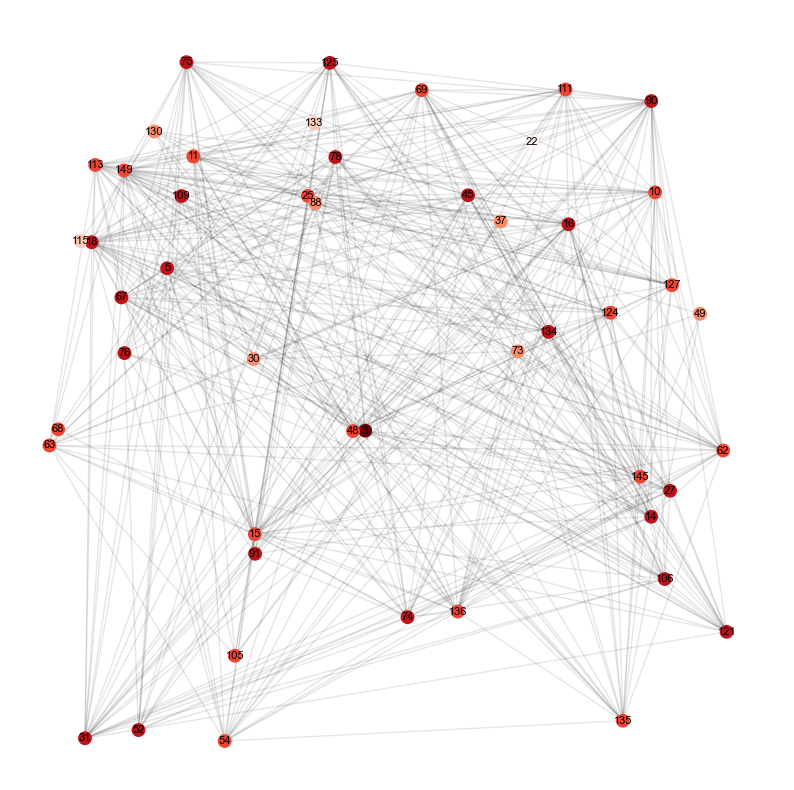

In [93]:
show_adj_matrix_graph(G1, show_label=True, figsize=[10, 10])

>## entire graph

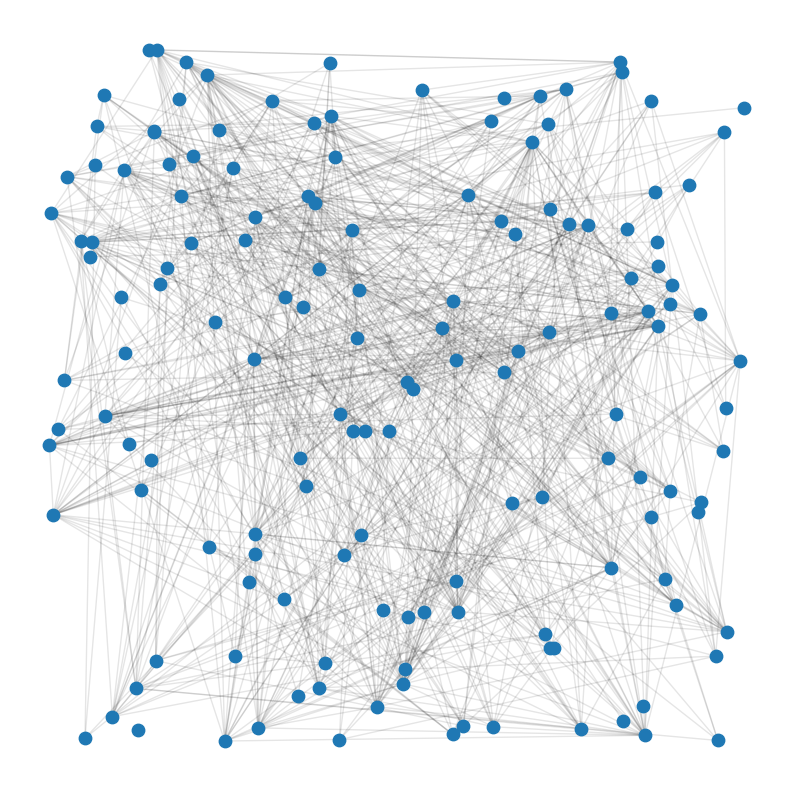

In [94]:
show_adj_matrix_graph(G, figsize=[10, 10])

## Exercise2: Draw each IRIS class with different node shapes from the calculated graph

In [79]:
def get_node_shape (node_num) :
    classes = list(df_iris.drop_duplicates(subset=[4])[4])
    shapes = ['o', '^', 'd', 's', '8']
    switcher = {classes[i] : shapes[i] for i in range(len(classes)) }
    return switcher.get(df_iris[4][node_num], 'o')

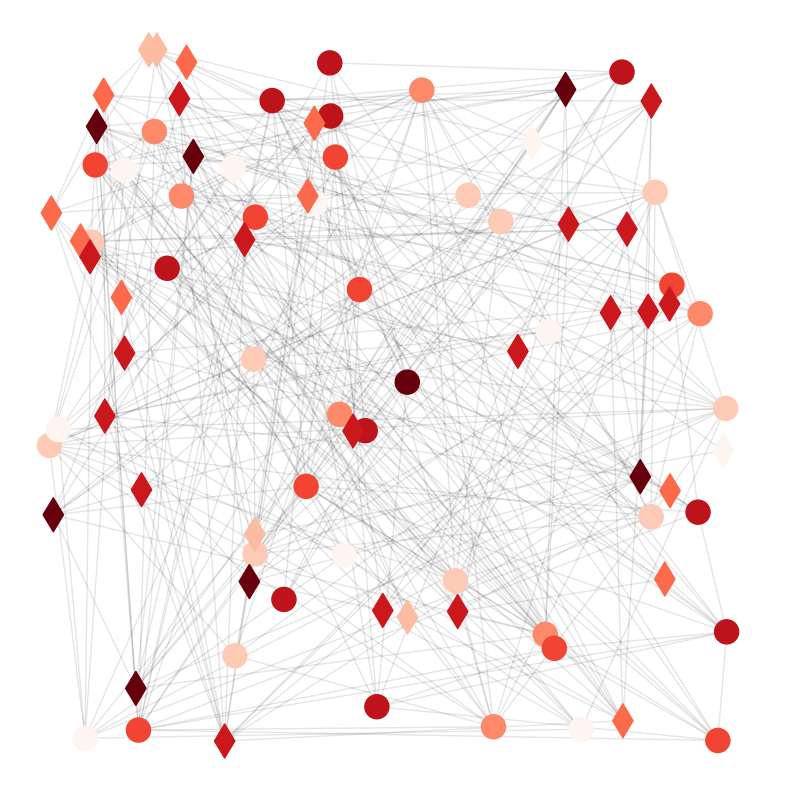

In [95]:
show_adj_matrix_graph(G0, node_shape_map_cb=get_node_shape, figsize=[10, 10])

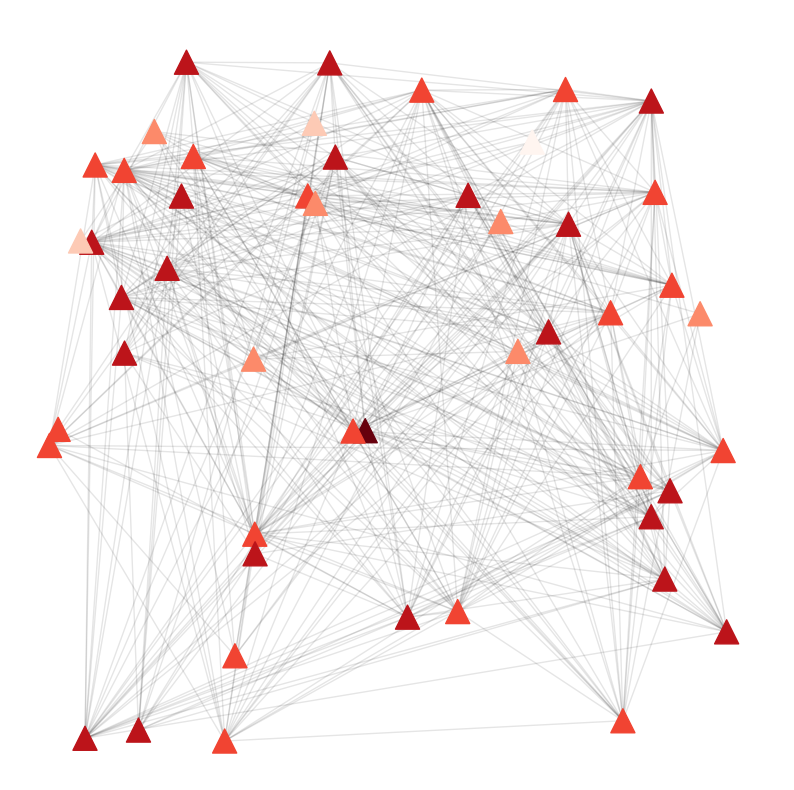

In [96]:
show_adj_matrix_graph(G1, node_shape_map_cb=get_node_shape, figsize=[10, 10])

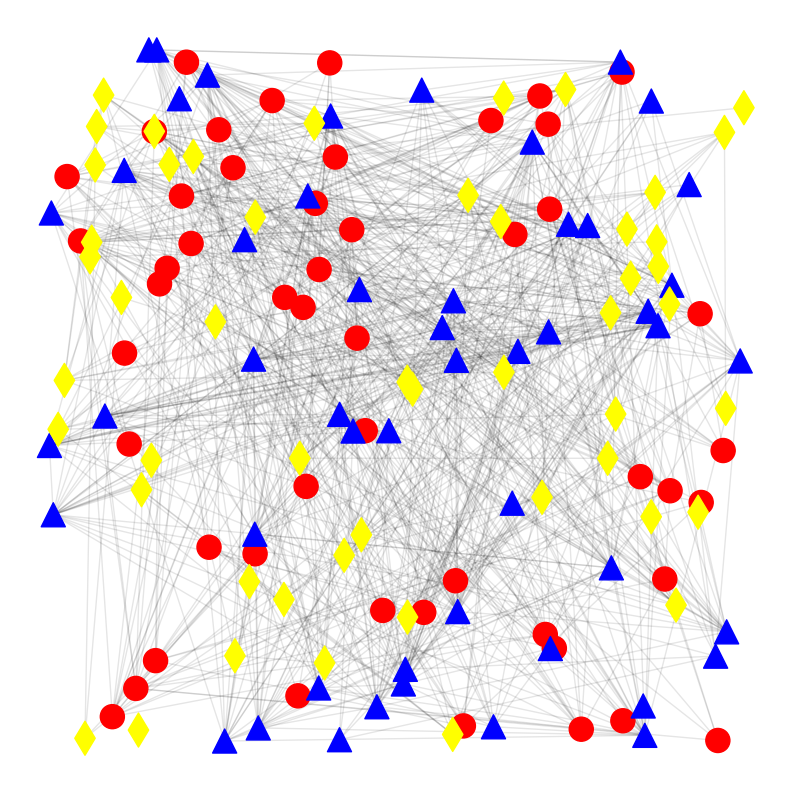

In [97]:
show_adj_matrix_graph(G, node_shape_map_cb=get_node_shape, figsize=[10, 10])

## Exercise3: Draw degree distribution of the calculated graph

### Function for draw the graph

In [103]:
def plot_degree_dist(G):
    degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
    dmax = max(degree_sequence)

    fig = plt.figure("Degree of a random graph", figsize=(8, 4))
    # Create a gridspec for adding subplots of different sizes
    axgrid = fig.add_gridspec(1, 4)

    ax1 = fig.add_subplot(axgrid[0:, :2])
    ax1.plot(degree_sequence, "b-", marker="o")
    ax1.set_title("Degree Rank Plot")
    ax1.set_ylabel("Degree")
    ax1.set_xlabel("Rank")

    ax2 = fig.add_subplot(axgrid[0:, 2:])
    ax2.bar(*np.unique(degree_sequence, return_counts=True))
    ax2.set_title("Degree histogram")
    ax2.set_xlabel("Degree")
    ax2.set_ylabel("# of Nodes")

    fig.tight_layout()
    plt.show()

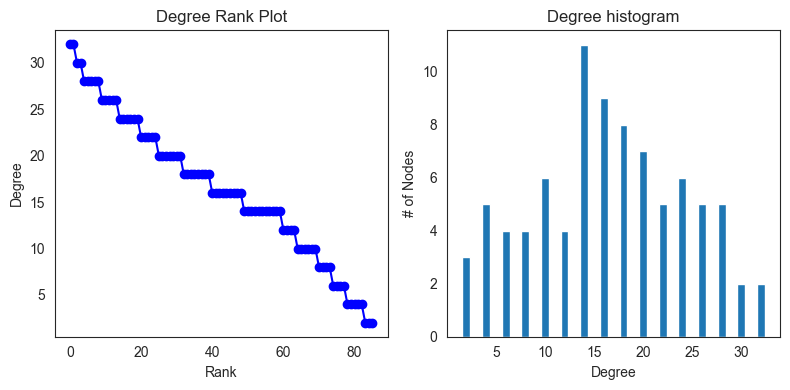

In [100]:
plot_degree_dist(G0)

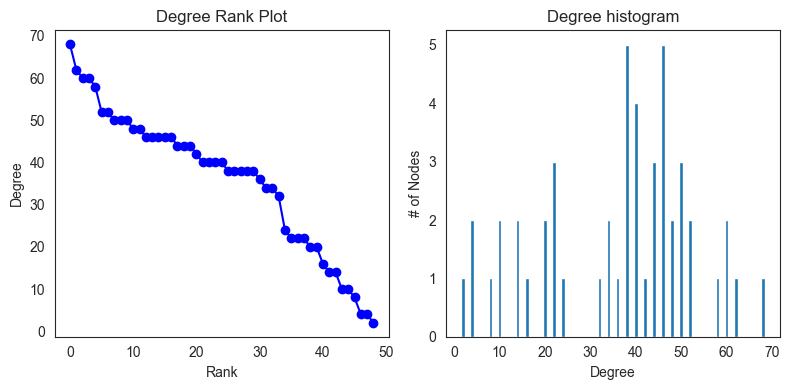

In [101]:
plot_degree_dist(G1)

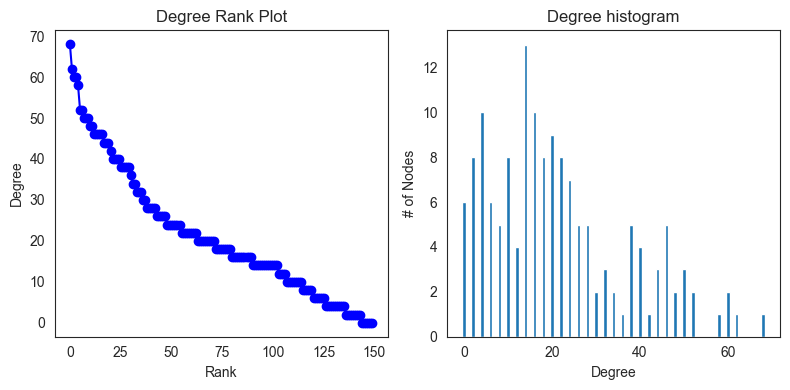

In [102]:
plot_degree_dist(G)